In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../IMDB Dataset.csv")
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [3]:
import string
df["review"]=df["review"].str.replace("<br />","")
df["review"]=df["review"].str.lower()
df["review"]=df["review"].map(lambda x:x.translate(str.maketrans('', '', string.punctuation)))

In [4]:
from sklearn.naive_bayes import MultinomialNB as NB
from sklearn.linear_model import LogisticRegression as LR
from sklearn.svm import LinearSVC as svc
from sklearn.pipeline import Pipeline
#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [5]:
X = df["review"]
y = df["sentiment"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
import mlflow
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
def evaluate(sk_model, x_test, y_test):
    eval_acc = sk_model.score(x_test, y_test)
    preds = sk_model.predict(x_test)
    mlflow.log_metric("eval_acc", eval_acc) # nous avons fait la même chose pour l'accuracy de test (evaluation)
    print(f"Eval Accuracy: {eval_acc:.3%}")
    plt.clf()
    conf_matrix = confusion_matrix(y_test, preds)
    ax = sns.heatmap(conf_matrix, annot=True,fmt='g')
    ax.invert_xaxis()
    ax.invert_yaxis()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title("Confusion Matrix")
    plt.savefig("sklearn_conf_matrix.png")
    mlflow.log_artifact("sklearn_conf_matrix.png")

c:\Users\pc\AppData\Local\Programs\Python\Python38\lib\site-packages\pydantic\_internal\_fields.py:128: UserWarning: Field "model_server_url" has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(
c:\Users\pc\AppData\Local\Programs\Python\Python38\lib\site-packages\pydantic\_internal\_config.py:317: UserWarning: Valid config keys have changed in V2:
* 'schema_extra' has been renamed to 'json_schema_extra'
  warnings.warn(message, UserWarning)


In [7]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words="english")
tfidf.fit(X_train)
X_train = tfidf.transform(X_train)
X_test = tfidf.transform(X_test)

2023/11/27 11:53:28 INFO mlflow.tracking.fluent: Experiment with name 'IMDB_assignment' does not exist. Creating a new experiment.


Train Accuracy: 92.397%
Eval Accuracy: 86.358%
Model run:  8ec485639baf42a29257667e2e41ac8e


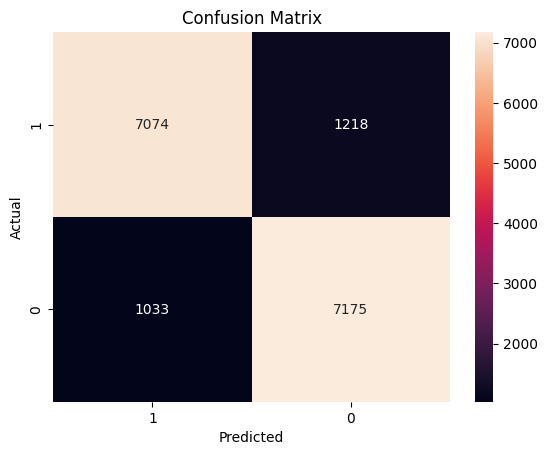

In [16]:
model = NB(alpha=1)
mlflow.set_experiment("IMDB_assignment")
with mlflow.start_run():
    #train(sk_model, x_train, y_train)
    params = {
    "alpha": 1,
    }
    mlflow.log_params(params)
    sk_model = model.fit(X_train, y_train)
    train_acc = model.score(X_train, y_train)
    mlflow.log_metric("train_acc", train_acc) # ce bout de code va nous aider à suivre la mesure training accuracy. nous avons dit à Mlflow de suivre cette métrique à chaque exécution de code
    print(f"Train Accuracy: {train_acc:.3%}")
    evaluate(model, X_test, y_test)
    mlflow.sklearn.log_model(model, "log_reg_model")
    print("Model run: ", mlflow.active_run().info.run_uuid)
mlflow.end_run()

Train Accuracy: 92.916%
Eval Accuracy: 86.358%
Model run:  dd4621cbc08542ff9d0229508403e5a7


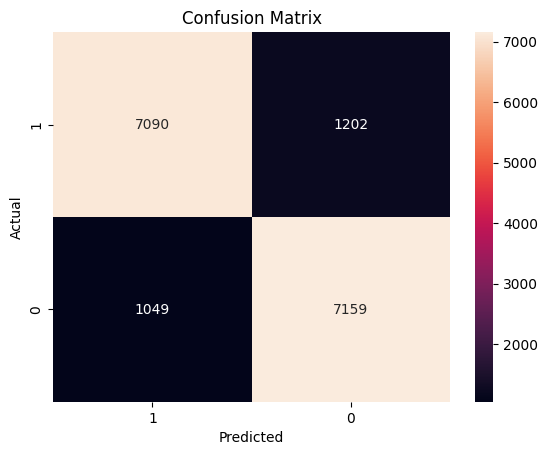

In [17]:
model = NB(alpha=0.8)
mlflow.set_experiment("IMDB_assignment")
with mlflow.start_run():
    #train(sk_model, x_train, y_train)
    params = {
    "alpha": 0.8,
    }
    mlflow.log_params(params)
    sk_model = model.fit(X_train, y_train)
    train_acc = model.score(X_train, y_train)
    mlflow.log_metric("train_acc", train_acc) # ce bout de code va nous aider à suivre la mesure training accuracy. nous avons dit à Mlflow de suivre cette métrique à chaque exécution de code
    print(f"Train Accuracy: {train_acc:.3%}")
    evaluate(model, X_test, y_test)
    mlflow.sklearn.log_model(model, "log_reg_model")
    print("Model run: ", mlflow.active_run().info.run_uuid)
mlflow.end_run()

Train Accuracy: 93.755%
Eval Accuracy: 89.018%
Model run:  ec034bcc14224e0693cfa0235724ae40


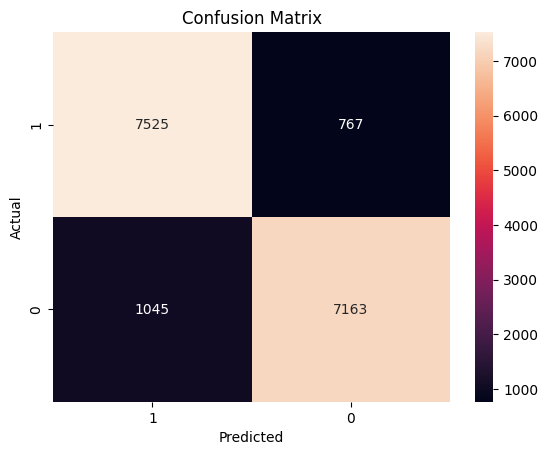

In [18]:
model = LR(penalty="l2")
mlflow.set_experiment("IMDB_assignment")
with mlflow.start_run():
    #train(sk_model, x_train, y_train)
    params = {
    "penalty": "l2",
    }
    mlflow.log_params(params)
    sk_model = model.fit(X_train, y_train)
    train_acc = model.score(X_train, y_train)
    mlflow.log_metric("train_acc", train_acc) # ce bout de code va nous aider à suivre la mesure training accuracy. nous avons dit à Mlflow de suivre cette métrique à chaque exécution de code
    print(f"Train Accuracy: {train_acc:.3%}")
    evaluate(model, X_test, y_test)
    mlflow.sklearn.log_model(model, "log_reg_model")
    print("Model run: ", mlflow.active_run().info.run_uuid)
mlflow.end_run()

c:\Users\pc\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


Train Accuracy: 100.000%
Eval Accuracy: 87.642%
Model run:  06e719813fa045b4b266687f2235ffca


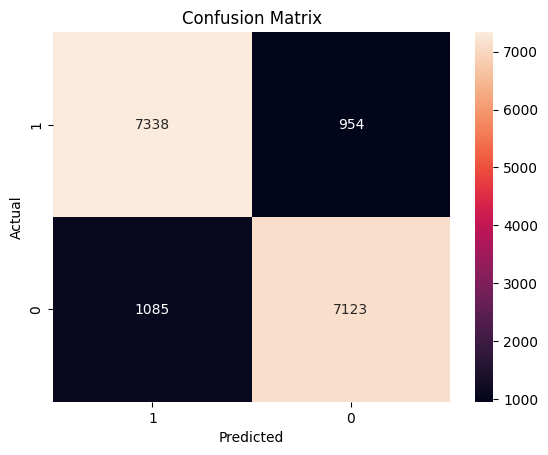

In [19]:
model = LR(penalty="none")
mlflow.set_experiment("IMDB_assignment")
with mlflow.start_run():
    #train(sk_model, x_train, y_train)
    params = {
    "penalty": "none",
    }
    mlflow.log_params(params)
    sk_model = model.fit(X_train, y_train)
    train_acc = model.score(X_train, y_train)
    mlflow.log_metric("train_acc", train_acc) # ce bout de code va nous aider à suivre la mesure training accuracy. nous avons dit à Mlflow de suivre cette métrique à chaque exécution de code
    print(f"Train Accuracy: {train_acc:.3%}")
    evaluate(model, X_test, y_test)
    mlflow.sklearn.log_model(model, "log_reg_model")
    print("Model run: ", mlflow.active_run().info.run_uuid)
mlflow.end_run()

c:\Users\pc\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Train Accuracy: 99.433%
Eval Accuracy: 89.206%
Model run:  ba493d2629654ca6b0e631b083a7d47a


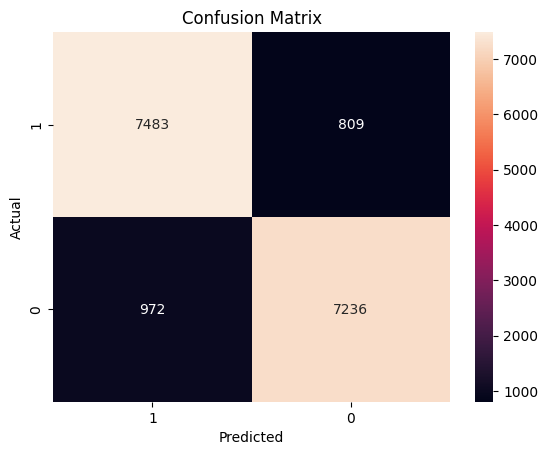

In [21]:
model = svc(C=1)
mlflow.set_experiment("IMDB_assignment")
with mlflow.start_run():
    #train(sk_model, x_train, y_train)
    params = {
    "C": 1,
    }
    mlflow.log_params(params)
    sk_model = model.fit(X_train, y_train)
    train_acc = model.score(X_train, y_train)
    mlflow.log_metric("train_acc", train_acc) # ce bout de code va nous aider à suivre la mesure training accuracy. nous avons dit à Mlflow de suivre cette métrique à chaque exécution de code
    print(f"Train Accuracy: {train_acc:.3%}")
    evaluate(model, X_test, y_test)
    mlflow.sklearn.log_model(model, "log_reg_model")
    print("Model run: ", mlflow.active_run().info.run_uuid)
mlflow.end_run()

The best model was svc with parameter C=1, and id ba493d2629654ca6b0e631b083a7d47a, which got 90% accuracy

In [23]:
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType
initial_type = [("Float_input", FloatTensorType())]
model = mlflow.sklearn.load_model("runs:/ba493d2629654ca6b0e631b083a7d47a/log_reg_model")
onx = convert_sklearn(model, initial_types=initial_type)
with open("../FastAPI/model.onnx", "wb") as f:
    f.write(onx.SerializeToString())

In [24]:
from pickle import dump
dump(tfidf, open('../FastAPI/stop_words_tfidf.pkl', 'wb'))